In [1]:
import pandas as pd
import numpy as np

In [68]:
df_news = pd.read_excel('../../data/分词并去停用词的新闻数据.xlsx')

In [69]:
df_news.head()

,title,content,label
0,NBA年度热文出炉 过去的2018年希望你能记住这十篇文章,文章 记录 时光 如果说 一年 365 天是 本书 文字 标注 记忆 书签 鞭辟入里 分析 ...,体育
1,李光洙公布恋情，女友李先彬竟撞脸宋慧乔张雨绮杨超越看懵网友,2018 李光洙 李先彬 恋情 公开 娱乐圈 一弹 粉红 炮弹 光洙 欧巴 2018 顺利 ...,时尚
2,火箭近11战10胜震惊联盟 哈登之外还有两人功不可没,北京 2019 时差 关系 火箭 主场 比赛 2018 收官 之战 一场 大胜 詹姆斯 哈登...,体育
3,邻邦扫描：伊朗有意购入“枭龙”战机 印度“不掺和”围堵中国,2018 南亚 军情 热点 频现 印度 俄罗斯 达成 多项 巨额 军售 订单 伊朗 有意 巴...,军事
4,车辆蓝牌之间的互换都有哪些条件的约束？,深圳 比亚迪 车辆 销量 新能源 汽车 燃油 汽车 比亚迪 比亚迪 消费者 青睐 消费者 在...,汽车


### Bag of Words Counts

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

X = df_news["content"]
y = df_news["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

### TruncatedSVD展示Bag of Words

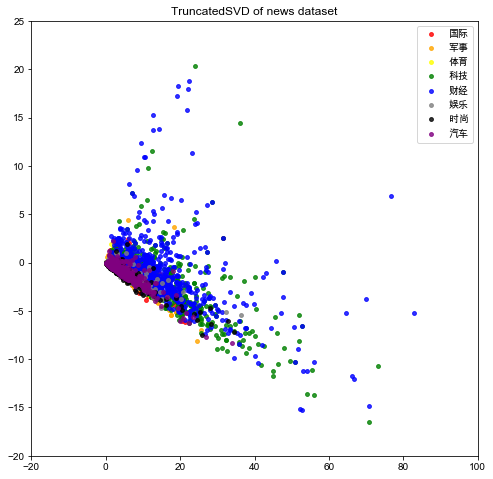

In [88]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt


def plot_LSA(X, y):
    
    lsa = TruncatedSVD(n_components=2)
    X_lsa = lsa.fit(X).transform(X)

    target_names = iris.target_names
    
    colors = ['red','orange','yellow','green','blue','gray','black','purple']
    labels = ['国际','军事','体育','科技','财经','娱乐','时尚','汽车']
    
    plt.rcParams['font.family'] = ['Arial Unicode MS'] #正常显示中文
    for color, i in zip(colors, labels):
        plt.scatter(X_lsa[y == i, 0], X_lsa[y == i, 1], s=15, alpha=.8, c=color, label=i)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('TruncatedSVD of news dataset')
    
    plt.show()    


fig = plt.figure(figsize=(8, 8))
axes = plt.gca()
axes.set_xlim([-20, 100])
axes.set_ylim([-20, 25])
plot_LSA(X_train_counts, y_train)


### 逻辑回归看一下结果

In [164]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### 评估

In [165]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.800, precision = 0.802, recall = 0.800, f1 = 0.800


### 混淆矩阵检查

In [166]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix,classification_report

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

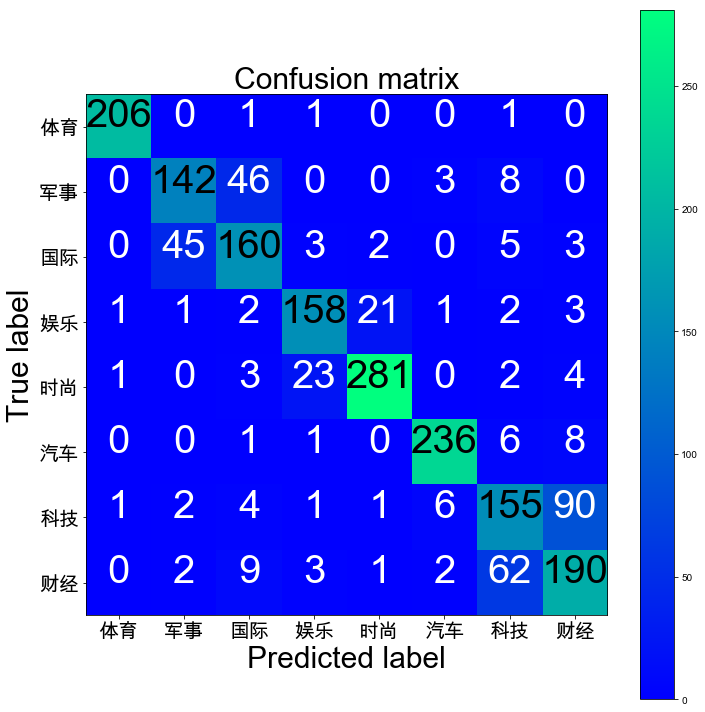

[[206   0   1   1   0   0   1   0]
 [  0 142  46   0   0   3   8   0]
 [  0  45 160   3   2   0   5   3]
 [  1   1   2 158  21   1   2   3]
 [  1   0   3  23 281   0   2   4]
 [  0   0   1   1   0 236   6   8]
 [  1   2   4   1   1   6 155  90]
 [  0   2   9   3   1   2  62 190]]


In [167]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['体育','军事','国际','娱乐','时尚','汽车','科技','财经'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

### 进一步检查模型的关注点

In [168]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
        
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

In [169]:
importance

{0: {'tops': [(0.39240842731205705, '冠军'),
   (0.4004860576407121, '国家队'),
   (0.41035014256690605, '腾讯'),
   (0.4296644236276201, '球迷'),
   (0.4351052953054174, '日讯'),
   (0.4722093572447812, '球员'),
   (0.5186368641319263, '体育'),
   (0.5193218908516429, '赛季'),
   (0.6581707425667545, '球队'),
   (0.8247363296570713, '比赛')],
  'bottom': [(-0.29171669275845974, '俄罗斯'),
   (-0.2980731461558688, '标准'),
   (-0.3044985902089991, '发展'),
   (-0.3067738570416669, '发布'),
   (-0.31644955483645015, '发现'),
   (-0.31700414657265524, '投入'),
   (-0.3456336503686627, '伦纳德'),
   (-0.35954695364473227, '环球网'),
   (-0.42368049241221645, '网友'),
   (-0.5817657642019894, '公司')]},
 1: {'tops': [(0.5105979457335443, '时报'),
   (0.5107613828858046, '参考消息'),
   (0.5141577700379822, '陆军'),
   (0.5163760486124346, '罗申科'),
   (0.5384168418873642, '网站'),
   (0.5469897570160261, '军方'),
   (0.5514026101667587, '台湾'),
   (0.5544725403315686, '环球时报'),
   (0.6105094651897697, '编辑'),
   (0.9030084172633508, '军事')],
  'botto

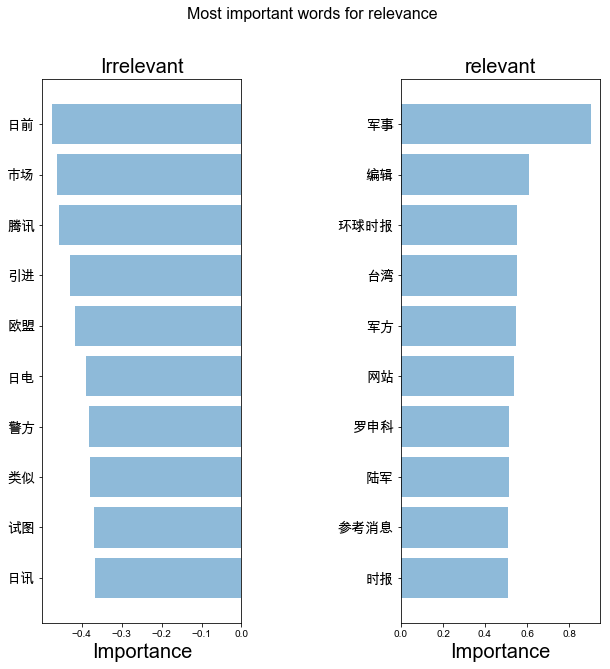

In [179]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Irrelevant', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('relevant', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[1]['tops']]
top_words = [a[1] for a in importance[1]['tops']]
bottom_scores = [a[0] for a in importance[1]['bottom']]
bottom_words = [a[1] for a in importance[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

我们的模型找到了一些模式，但是看起来不够好！

### TF-IDF Bag of Words

这样我们就不均等对待每一个词了

In [171]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

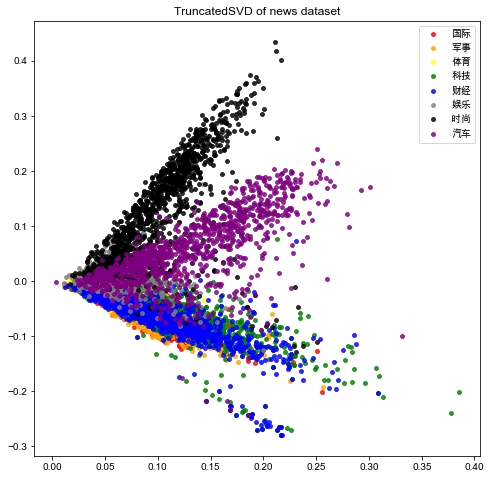

In [172]:
fig = plt.figure(figsize=(8, 8))          
plot_LSA(X_train_tfidf, y_train)

从降维后的可视化结果来看，tfidf模型让不同类新闻的可分性变得更好了！！

In [173]:
clf_tfidf = LogisticRegression()
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [174]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.828, precision = 0.830, recall = 0.828, f1 = 0.829


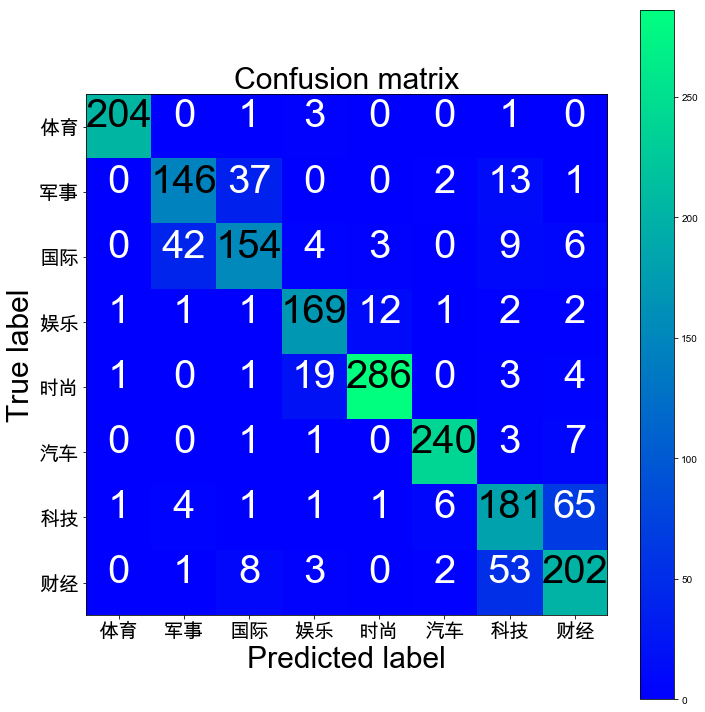

TFIDF confusion matrix
[[204   0   1   3   0   0   1   0]
 [  0 146  37   0   0   2  13   1]
 [  0  42 154   4   3   0   9   6]
 [  1   1   1 169  12   1   2   2]
 [  1   0   1  19 286   0   3   4]
 [  0   0   1   1   0 240   3   7]
 [  1   4   1   1   1   6 181  65]
 [  0   1   8   3   0   2  53 202]]
BoW confusion matrix
[[206   0   1   1   0   0   1   0]
 [  0 142  46   0   0   3   8   0]
 [  0  45 160   3   2   0   5   3]
 [  1   1   2 158  21   1   2   3]
 [  1   0   3  23 281   0   2   4]
 [  0   0   1   1   0 236   6   8]
 [  1   2   4   1   1   6 155  90]
 [  0   2   9   3   1   2  62 190]]


In [175]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm2, classes=['体育','军事','国际','娱乐','时尚','汽车','科技','财经'], normalize=False, title='Confusion matrix')
plt.show()
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

### 词语的解释

In [176]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

In [177]:
importance_tfidf

{0: {'tops': [(2.450741901199787, '选手'),
   (2.505582589941238, '皇马'),
   (2.6442248768887766, '分钟'),
   (2.6715918899400495, '球迷'),
   (2.9422943832125488, '体育'),
   (3.0123322199765834, '冠军'),
   (4.481711074287927, '赛季'),
   (5.229068900229977, '球员'),
   (5.647570626104937, '球队'),
   (8.585213208916358, '比赛')],
  'bottom': [(-1.0881200696244846, '用户'),
   (-1.1875492291442267, '车型'),
   (-1.231385224329649, '特朗普'),
   (-1.3106906564171967, '汽车'),
   (-1.32887333232363, '市场'),
   (-1.347301560065349, '搭配'),
   (-1.3528624571933248, '设计'),
   (-1.356205387605994, '网友'),
   (-1.6236850271012375, '美国'),
   (-2.0154900812039234, '公司')]},
 1: {'tops': [(2.613153939520325, '训练'),
   (2.669214376194363, '发射'),
   (2.6792710759868656, '航母'),
   (2.866827000882734, '战斗机'),
   (2.869579580769595, '导弹'),
   (3.011565002069684, '俄罗斯'),
   (3.2625204486272468, '台湾'),
   (3.3587893507387316, '军事'),
   (3.359608562021128, '美国'),
   (3.37352896867993, '海军')],
  'bottom': [(-1.1079912323807997, '用户')

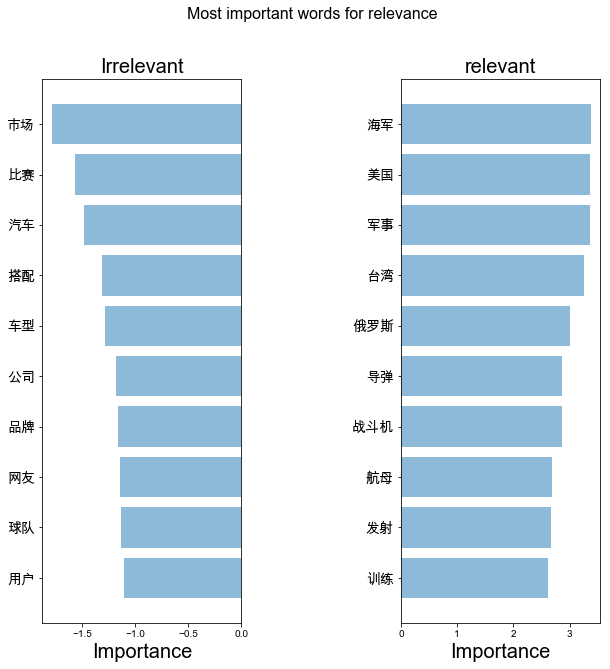

In [180]:
top_scores = [a[0] for a in importance_tfidf[1]['tops']]
top_words = [a[1] for a in importance_tfidf[1]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[1]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

重要的特征词比之前好了一些

### 问题

我们现在考虑的是每一个词基于频率的情况，如果在新的测试环境下有些词变了呢？比如说“时尚”和"fashion"。有些词可能表达的意义差不多但是却长得不一样，这样我们的模型就难捕捉到了。

In [181]:
import gensim

word2vec_path = "baike_26g_news_13g_novel_229g.bin"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [182]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=128):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['content'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [183]:
embeddings = get_word2vec_embeddings(word2vec, df_news)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, 
                                                                                        df_news['label'].tolist(), 
                                                                                        test_size=0.2, random_state=40)

In [184]:
X_train_word2vec[0]

array([-0.26139283,  0.35417139, -0.17971076,  0.35549133,  0.8110607 ,
       -0.26142886, -0.23823029,  0.02630847,  0.31088775, -0.43964705,
       -0.92327979,  0.07842881, -0.34579319,  0.23583804,  0.03314693,
       -0.46190642,  0.26059584, -0.47067221, -0.51718345,  0.01638709,
       -0.89889435,  0.03270356,  0.62064657, -0.04899169, -0.31516523,
        0.13532589,  0.06112823,  0.21980799, -0.46741434, -0.05353414,
        0.57526036,  0.64684145, -0.06510958,  0.09131757, -0.14742461,
       -0.04495164, -0.25528852,  0.02499849, -0.03285292, -0.06751917,
        0.23115584, -0.10738373, -0.18769445,  0.11441232,  0.95751307,
        0.11638871,  0.82038947, -0.41127727,  0.13335517, -0.23075711,
       -0.27991078,  0.25408038, -0.09576355, -0.55918907,  0.43750977,
        0.03603632, -0.37202399, -0.07141567,  0.14782979, -0.010945  ,
        0.17749803, -0.54285635,  0.06530579, -0.13574248,  0.26260461,
       -0.31079626, -0.18587966,  0.17879131, -0.08648327,  0.53

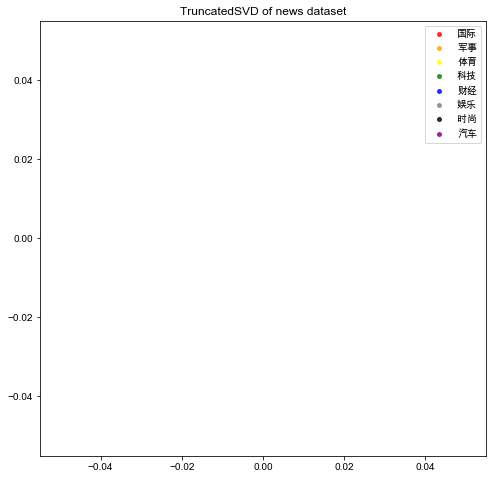

In [185]:
fig = plt.figure(figsize=(8, 8))          
plot_LSA(embeddings, df_news['label'].tolist())
plt.show()

In [186]:
from sklearn.linear_model import LogisticRegression
clf_w2v = LogisticRegression()
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [187]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

accuracy = 0.783, precision = 0.783, recall = 0.783, f1 = 0.782
